[Github Link](https://github.com/jessiejzhou/math156-hw02)
[](https://github.com/jessiejzhou/math156-hw02)

In [2]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandoc

## Question 4

a) Download the “.csv” file for the red wines in the “Wine Quality” 

In [506]:
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

b) Split the dataset into train, validation, and test sets. You can use scikit-learn’s train test split
function.

In [698]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15)

c) Write a program for training a simple linear regression model with sum-of-squares error function
using the closed-form solution (do not use a built-in function).


From assignment one, we know the solution to the linear regression model is $(X^TX)^{-1}X^TY$.

In [699]:
def concat_ones(X):
    # helper to add 1 in front of every training sample
    return np.concatenate([np.ones(shape=(len(X), 1)), X], axis=1)


def slr(X, y):
    X = concat_ones(X)
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

d) For the train data, generate a plot of the actual target values vs predicted target values. How do
we interpret this plot?


**Answer:**
We can interpret this plot as a distribution of the prediction accuracy. Ideally, we would want the points to sit around the line y = x, meaning that the predicted value of y is close to the actual value. However, we see that for each actual value of y, there is large variance in the predictions. For values < 5 and > 7, there are no predictions that reach the actual value.

In [700]:
coef = slr(X_train, y_train)
y_pred = concat_ones(X_train) @ coef

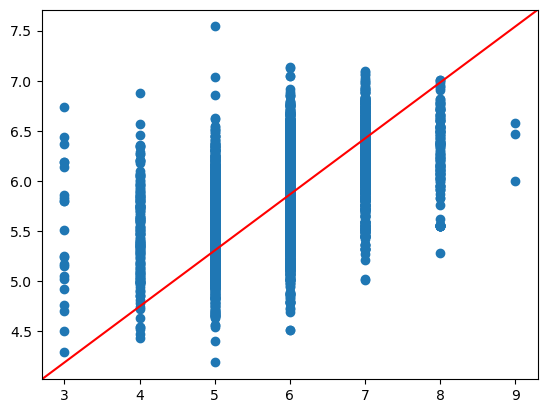

In [701]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

e) Report the root-mean-square on the train and test sets

In [702]:
def rmse(y_true, y_pred):
    error = y_pred.values - y_true.values
    return error.T @ error / len(y_true.values)

rmse_train = rmse(y_train, y_pred) 


y_test_pred = concat_ones(X_test) @ coef
rmse_test = rmse(y_test, y_test_pred)

print(f'RMSE train: {rmse_train.item()}, RMSE test: {rmse_test.item()}')

RMSE train: 0.5518064408839816, RMSE test: 0.5893413396411287


Implement the least-mean-squares (LMS) algorithm for linear regression with random initialization of w(0) and stepsize(s) of your choice

In [709]:
def lms_grad(x, y, w):
    return 2 * (y - w.T @ x) * x

def normalize(x):
    return (x - x.mean())/x.std()

def lms(w0, alpha, epoch, X, y): 
    w = w0
    for i in range(epoch):
        full = pd.concat([X, y], axis = 1)
        full = full.sample(frac = 1)
        X_shuffled = full.iloc[:, :-1]
        y_shuffled = full.iloc[:, -1].values
        X_shuffled = concat_ones(X_shuffled)
        for n in range(X_shuffled.shape[0]): # going through each row in shuffled
            w += alpha * lms_grad(X_shuffled[n], y_shuffled[n], w)     
    return w   

w0 = coef.values.flatten()

X_train = normalize(X_train)
y_train = normalize(y_train)

lms_coef = lms(w0, 0.001, 100, X_train, y_train)

Report the root-mean-square on the train and test sets.

In [710]:
y_lms_pred = pd.DataFrame(concat_ones(X_train) @ lms_coef)
rmse_lms_train = rmse(y_train, y_lms_pred) 


X_test = normalize(X_test)
y_test = normalize(y_test)

y_test_lms_pred = pd.DataFrame(concat_ones(X_test) @ lms_coef)
rmse_lms_test = rmse(y_test, y_test_lms_pred)

print(f'RMSE train: {rmse_lms_train.item()}, RMSE test: {rmse_lms_test.item()}')

RMSE train: 0.7175461464515183, RMSE test: 0.710907286487622
